In [32]:
using CMBLensing, PyPlot

In [27]:
@unpack ds, ϕ = load_sim(Nside=128, pol=:I, θpix=3);

Make some fake mask and put it in the right place/format in the `ds` object:

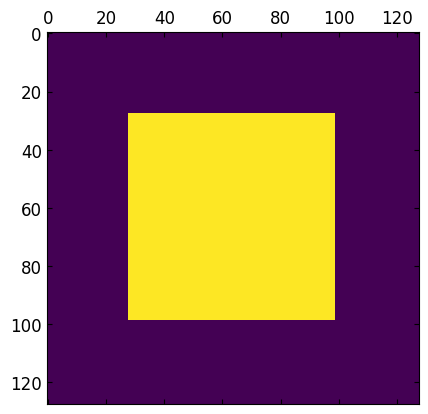

In [47]:
m = ones(Float32, 128, 128)

m[[1:28; 100:end], :] .= 0
m[:, [1:28; 100:end]] .= 0;

matshow(m)

ds.M = Diagonal(FlatMap(m, θpix=3)); # the mask operator is diagonal in map-space, so its a Diagonal(FlatMap(...))

Generate a lense-free simulation (the new data is stored inside the `ds` object itself, and you can use `seed` to make it reproducible:

In [33]:
@unpack f, ds = resimulate(ds, ϕ=0ϕ, seed=0);

Do a Wiener-filter at $\phi$=0:

In [46]:
fwf = argmaxf_lnP(0ϕ, ds, conjgrad_kwargs=(progress=true, tol=1e-2,));

Conjugate Gradient: 100%|███████████████████████████████| Time: 0:00:37
Conjugate Gradient: 100%|███████████████████████████████| Time: 0:00:38


Plot results:

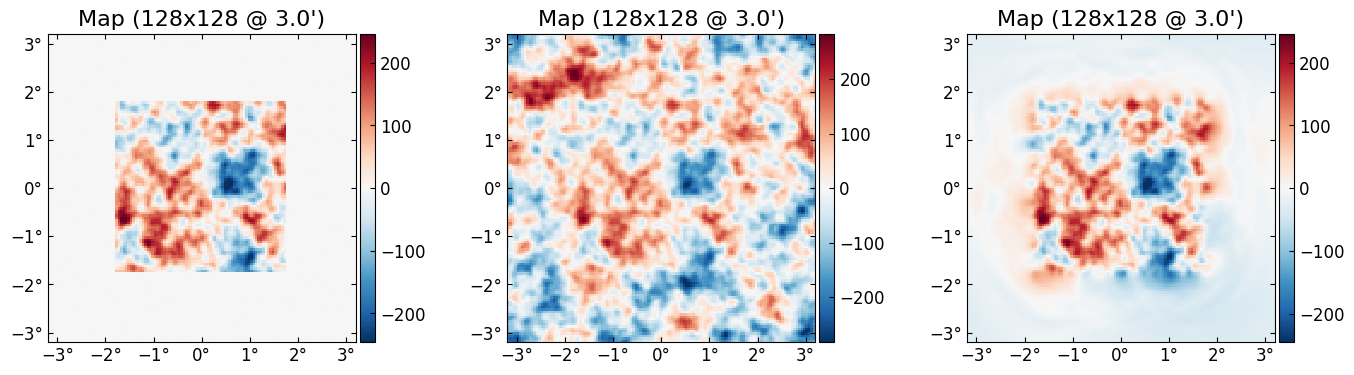

In [45]:
plot([ds.d f fwf], label=["data" "truth" "WF"])